In [34]:
# Importing relevant libraries.

import requests, pandas as pd
import json
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
from sklearn.pipeline import make_pipeline
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [35]:
# Reading the Oxford COVID stringency data. This data is updated frequently.

df=pd.read_csv("https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/stringency_index.csv", encoding='latin-1')

In [36]:
df

,Unnamed: 0,country_code,country_name,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,09Jan2020,10Jan2020,11Jan2020,12Jan2020,13Jan2020,14Jan2020,15Jan2020,16Jan2020,17Jan2020,18Jan2020,19Jan2020,20Jan2020,21Jan2020,22Jan2020,23Jan2020,24Jan2020,25Jan2020,26Jan2020,27Jan2020,28Jan2020,29Jan2020,30Jan2020,31Jan2020,01Feb2020,02Feb2020,03Feb2020,04Feb2020,05Feb2020,06Feb2020,...,30Nov2021,01Dec2021,02Dec2021,03Dec2021,04Dec2021,05Dec2021,06Dec2021,07Dec2021,08Dec2021,09Dec2021,10Dec2021,11Dec2021,12Dec2021,13Dec2021,14Dec2021,15Dec2021,16Dec2021,17Dec2021,18Dec2021,19Dec2021,20Dec2021,21Dec2021,22Dec2021,23Dec2021,24Dec2021,25Dec2021,26Dec2021,27Dec2021,28Dec2021,29Dec2021,30Dec2021,31Dec2021,01Jan2022,02Jan2022,03Jan2022,04Jan2022,05Jan2022,06Jan2022,07Jan2022,08Jan2022
0,1,ABW,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,41.67,41.67,41.67,41.67,41.67,41.67,41.67,41.67,41.67,41.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,27.78,27.78,27.78,27.78,27.78,27.78,27.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.56,...,61.11,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,45.37,45.37,45.37,45.37,45.37,45.37,45.37,45.37,45.37,45.37,45.37,45.37,45.37,45.37,NaN,NaN,NaN,NaN,NaN,NaN,46.30,46.30,46.30,46.30,46.30,46.30,46.30,46.30,46.30,46.30,46.30,46.30,46.30,46.30,46.30,NaN,NaN,NaN,NaN,NaN
4,5,AND,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,48.15,48.15,48.15,48.15,48.15,48.15,48.15,59.26,59.26,59.26,59.26,59.26,59.26,59.26,59.26,59.26,59.26,59.26,59.26,59.26,59.26,59.26,59.26,59.26,59.26,59.26,59.26,59.26,59.26,59.26,59.26,59.26,59.26,59.26,59.26,59.26,59.26,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,182,VUT,Vanuatu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,19.44,NaN,NaN,NaN,NaN,NaN
182,183,YEM,Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,12.04,12.04,12.04,12.04,12.04,12.04,12.04,12.04,12.04,12.04,12.04,12.04,12.04,12.04,12.04,12.04,12.04,12.04,12.04,12.04,12.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,184,ZAF,South Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [37]:
# I want the dates and values to be in rows, not their own columns.

df3 = df.melt(id_vars=['country_code'], 
value_vars=['01Jan2020','01Feb2020','01Mar2020','01Apr2020','01May2020','01Jun2020','01Jul2020','01Aug2020','01Sep2020','01Oct2020','01Nov2020','01Dec2020','01Jan2021','01Feb2021','01Mar2021','01Apr2021','01May2021','01Jun2021','01Jul2021','01Aug2021','01Sep2021','01Oct2021','01Nov2021','01Dec2021'], var_name='Date', 
value_name='Stringency')

In [38]:
df3.columns

Index(['country_code', 'Date', 'Stringency'], dtype='object')

In [39]:
# Renaming

df3 = df3.rename(columns={"country_code": "Country", "Date":"Month"})

In [40]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4464 entries, 0 to 4463
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     4464 non-null   object 
 1   Month       4464 non-null   object 
 2   Stringency  4434 non-null   float64
dtypes: float64(1), object(2)
memory usage: 104.8+ KB


In [41]:
# Converting date format.

df3['Month'] = pd.to_datetime(df3['Month'], format='%d%b%Y')

In [42]:
df3

,Country,Month,Stringency
0,ABW,2020-01-01,0.00
1,AFG,2020-01-01,0.00
2,AGO,2020-01-01,0.00
3,ALB,2020-01-01,0.00
4,AND,2020-01-01,0.00
...,...,...,...
4459,VUT,2021-12-01,19.44
4460,YEM,2021-12-01,12.04
4461,ZAF,2021-12-01,45.37
4462,ZMB,2021-12-01,37.96


In [43]:
# Export to plot

df3.to_csv("proj_stringency_time.csv",encoding = 'utf-8', index=False)

In [44]:
df4=pd.read_csv("https://raw.githubusercontent.com/joesellis/joesellis.github.io/main/DP_LIVE_02012022132745793.csv", encoding='latin-1', usecols = ['ï»¿"LOCATION"', 'TIME', 'Value'])

In [45]:
df4

,"ï»¿""LOCATION""",TIME,Value
0,AUS,2020-01,5.311689
1,AUS,2020-02,5.133660
2,AUS,2020-03,5.271841
3,AUS,2020-04,6.374280
4,AUS,2020-05,7.018550
...,...,...,...
873,CRI,2021-05,18.002090
874,CRI,2021-06,17.435670
875,CRI,2021-07,16.364760
876,CRI,2021-08,15.308370


In [46]:
# Renaming columns

df4 = df4.rename(columns={'ï»¿"LOCATION"': "Country", "TIME":"Month","Value":"Unemployment"})

In [47]:
df4.columns

Index(['Country', 'Month', 'Unemployment'], dtype='object')

In [48]:
df4

,Country,Month,Unemployment
0,AUS,2020-01,5.311689
1,AUS,2020-02,5.133660
2,AUS,2020-03,5.271841
3,AUS,2020-04,6.374280
4,AUS,2020-05,7.018550
...,...,...,...
873,CRI,2021-05,18.002090
874,CRI,2021-06,17.435670
875,CRI,2021-07,16.364760
876,CRI,2021-08,15.308370


In [49]:
# Reformatting dates.

df4['Month'] = pd.to_datetime(df4['Month'], format='%Y-%m')

In [50]:
df4

,Country,Month,Unemployment
0,AUS,2020-01-01,5.311689
1,AUS,2020-02-01,5.133660
2,AUS,2020-03-01,5.271841
3,AUS,2020-04-01,6.374280
4,AUS,2020-05-01,7.018550
...,...,...,...
873,CRI,2021-05-01,18.002090
874,CRI,2021-06-01,17.435670
875,CRI,2021-07-01,16.364760
876,CRI,2021-08-01,15.308370


In [51]:
# Merging Unemployment and Stringency data.

merged = pd.merge(df4, df3)

In [52]:
merged

,Country,Month,Unemployment,Stringency
0,AUS,2020-01-01,5.311689,0.00
1,AUS,2020-02-01,5.133660,13.89
2,AUS,2020-03-01,5.271841,19.44
3,AUS,2020-04-01,6.374280,71.30
4,AUS,2020-05-01,7.018550,69.44
...,...,...,...,...
785,CRI,2021-05-01,18.002090,62.04
786,CRI,2021-06-01,17.435670,66.67
787,CRI,2021-07-01,16.364760,55.56
788,CRI,2021-08-01,15.308370,54.63


In [53]:
merged.columns = ['Country Code', 'Month', 'Unemployment', 'Stringency']

In [54]:
merged

,Country Code,Month,Unemployment,Stringency
0,AUS,2020-01-01,5.311689,0.00
1,AUS,2020-02-01,5.133660,13.89
2,AUS,2020-03-01,5.271841,19.44
3,AUS,2020-04-01,6.374280,71.30
4,AUS,2020-05-01,7.018550,69.44
...,...,...,...,...
785,CRI,2021-05-01,18.002090,62.04
786,CRI,2021-06-01,17.435670,66.67
787,CRI,2021-07-01,16.364760,55.56
788,CRI,2021-08-01,15.308370,54.63


In [55]:
# I want the country name for the countries I will plot on vega lite, so I use this function

def Country_Name (row):
   if row['Country Code'] == 'COL' :
      return 'Columbia'
   if row['Country Code'] == 'GBR' :
      return 'United Kingdom'
   if row['Country Code'] == 'ESP' :
      return 'Spain'
   if row['Country Code'] == 'USA':
      return 'United States'
   if row['Country Code']  == 'IND':
      return 'India'
   if row['Country Code'] == 'RUS':
      return 'Russia'
   if row['Country Code'] == 'JPN':
      return 'Japan'
   if row['Country Code']  == 'BRA':
      return 'Brazil'
   if row['Country Code'] == 'DEU':
      return 'Germany'
   if row['Country Code'] == 'ARG':
      return 'Argentina'
   if row['Country Code'] == 'ITA':
      return 'Italy'
   if row['Country Code'] == 'SWE':
      return 'Sweden'
   if row['Country Code'] == 'ISL':
      return 'Israel'
   if row['Country Code'] == 'FRA':
      return 'France'
   if row['Country Code'] == 'NLD':
      return 'The Netherlands'
   if row['Country Code'] == 'NOR':
      return 'Norway'
   if row['Country Code'] == 'TUR':
      return 'Turkey'
   # In case of error   
   return 'other'

In [56]:
merged['Country'] = merged.apply (lambda row: Country_Name(row), axis=1)

In [57]:
merged

,Country Code,Month,Unemployment,Stringency,Country
0,AUS,2020-01-01,5.311689,0.00,other
1,AUS,2020-02-01,5.133660,13.89,other
2,AUS,2020-03-01,5.271841,19.44,other
3,AUS,2020-04-01,6.374280,71.30,other
4,AUS,2020-05-01,7.018550,69.44,other
...,...,...,...,...,...
785,CRI,2021-05-01,18.002090,62.04,other
786,CRI,2021-06-01,17.435670,66.67,other
787,CRI,2021-07-01,16.364760,55.56,other
788,CRI,2021-08-01,15.308370,54.63,other


In [58]:
# Clean data is now ready to export.

merged.to_csv("proj_stringency_unemp2.csv",encoding = 'utf-8', index=False)

Model slope:     0.03594433068231495
Model intercept: 5.388655532673434


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


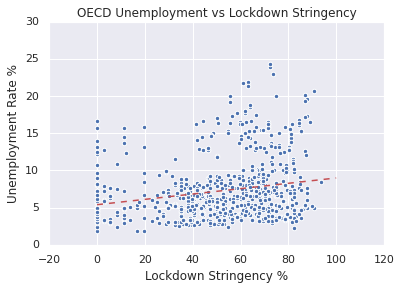

In [59]:
# I chose to run a simple linear regression to test for correlation.

y = merged['Unemployment']
x = merged['Stringency']
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 100, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, 'r--' );
plt.ylabel('Unemployment Rate %')
plt.xlabel('Lockdown Stringency %')
plt.title('OECD Unemployment vs Lockdown Stringency')

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


(-0.7, 100.0)

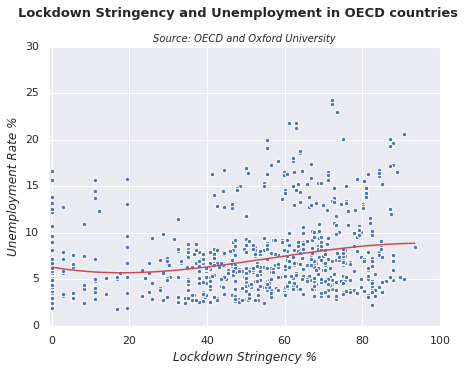

In [60]:
# I chose to run a polynomial regression to fit the data a little bit better.

poly_model = make_pipeline(PolynomialFeatures(3),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

fig = plt.figure(figsize=[7,5])
ax = plt.subplot(111)

plt.scatter(x, y)
plt.plot(xfit, yfit,'r-' );
plt.xlabel('Lockdown Stringency %', style = 'italic', size = 12)
plt.ylabel('Unemployment Rate %', style = 'italic', size = 12)
title_string = "Lockdown Stringency and Unemployment in OECD countries"
subtitle_string = "Source: OECD and Oxford University"
plt.suptitle(title_string, y=1.01, fontsize=13, weight = 'bold')
plt.title(subtitle_string, fontsize=10, style = 'italic')
plt.xlim([-0.7, 100])

There is a very slight positive correlation between the stringency of the COVID lockdown and the Unemployment rate of a country across the OECD.